# Un breve análisis exploratorio de los datos

Lo vamos a hacer ya con el dataset procesado y con las columnas nuevas que hemos ido añadiendo en el notebook principal.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_parquet('../data/selected_data.parquet')

In [10]:
df

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral
0,8.13,38.205924,61.378360,1.47,-2.340000,-0.720000,-0.200000,8.910000,8.223000,0.635,0.70,8.2639,0.66,680.272095,5693.333496,-1.033413,-0.899513,O
1,8.46,38.335785,61.521721,2.13,-0.080000,-2.360000,-0.170000,8.875000,8.493000,0.362,0.42,8.5436,0.41,469.483582,6960.065430,0.101898,0.185498,O
2,8.85,168.619473,-61.344204,10.99,-65.702143,-6.615714,0.142143,9.199500,8.393071,0.954,0.94,9.0175,0.94,90.991814,4694.887207,4.054989,4.222488,O
3,2.21,120.896126,-40.003188,2.33,-30.820000,16.770000,-0.070000,1.957000,2.189000,-0.269,-0.22,2.1364,-0.22,429.184540,14328.858398,-5.953221,-6.026821,O
4,7.55,303.138025,40.268185,1.85,-7.760000,-2.540000,-0.040000,7.914000,7.589000,0.309,0.35,7.6252,0.47,540.540527,7274.275879,-1.114141,-1.038942,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107545,8.37,359.773830,55.956112,2.43,7.850000,-2.680000,-0.340000,8.388000,8.364000,0.010,0.03,8.3813,0.03,411.522644,9760.000000,0.298032,0.309332,A
107546,7.87,359.794345,74.807249,7.36,23.250000,-1.550000,-0.190000,8.321000,7.993000,0.302,0.35,7.9410,0.35,135.869568,7317.908691,2.204389,2.275389,A
107547,10.11,359.861315,-28.853834,3.09,21.070000,-6.110000,-0.070000,10.636000,10.170000,0.439,0.51,10.2104,0.72,323.624603,6549.079590,2.559793,2.660193,NaN
107548,9.93,359.948880,50.112499,19.39,434.100000,9.560000,-0.200000,11.173000,10.021000,0.890,0.90,10.0926,0.90,51.572975,4866.096680,6.367889,6.530489,K


## Matriz de correlación

/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/ipykernel_78851/462123408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


<AxesSubplot: >

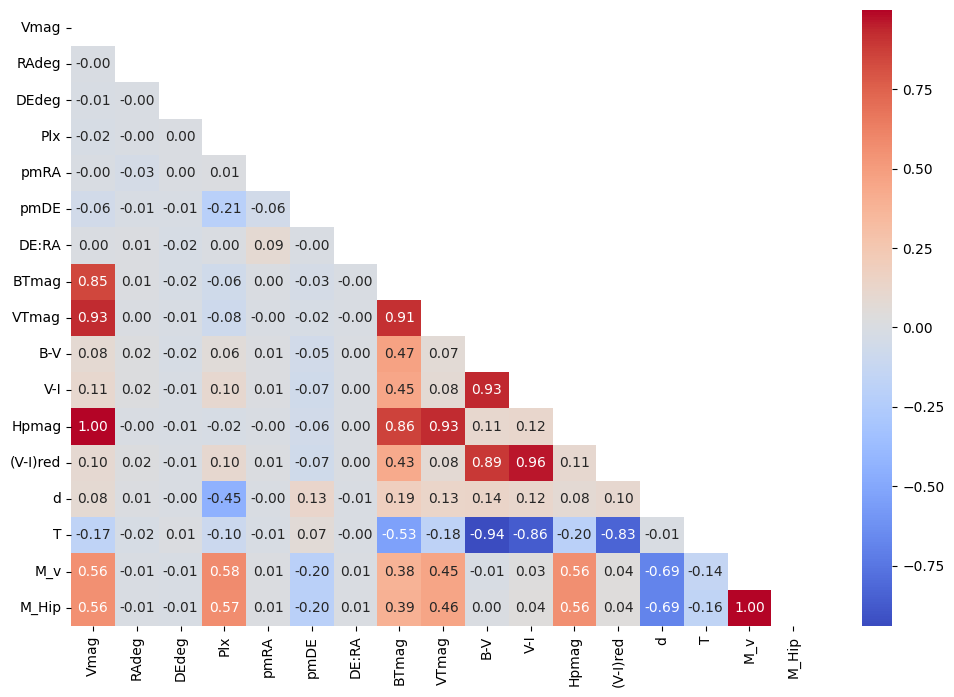

In [14]:
# Calcular la matriz de correlación
corr_matrix = df.corr(method='pearson')

# Crear un mapa de calor triangular inferior
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')

## Magnitud absoluta frente al tipo espectral de las estrellas:

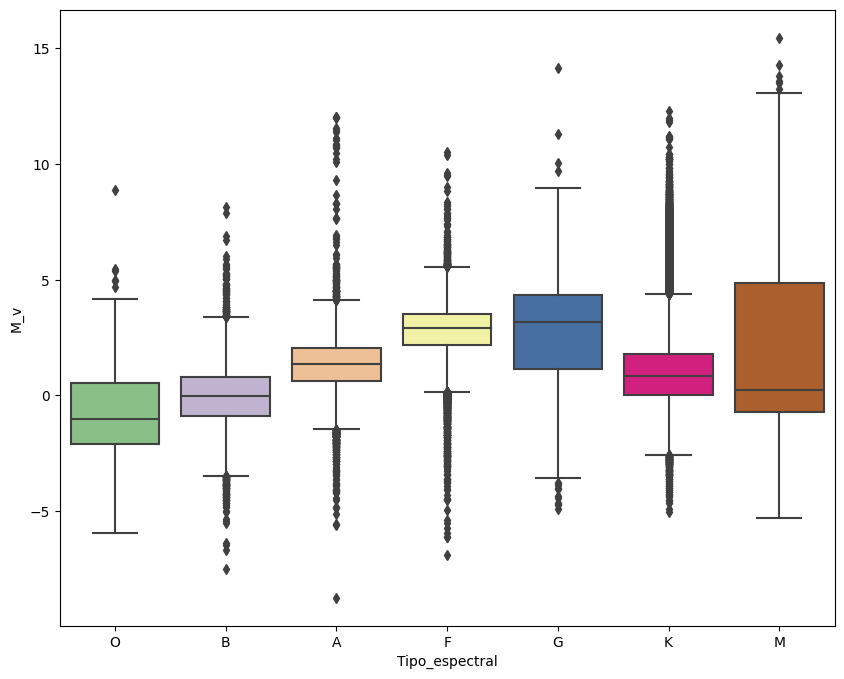

In [20]:
fig = plt.figure(figsize=(10, 8))
axes = sns.boxplot(data= df, x= "Tipo_espectral", y= "M_v", palette= "Accent")